In [52]:
%config IPCompleter.greedy=True
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series
from termcolor import colored

In [53]:
data = np.loadtxt("ex2data2.txt", delimiter=",")

In [54]:
print(data[:5])

[[ 0.051267  0.69956   1.      ]
 [-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]]


In [55]:
X = data[:,:2]
y = data[:,2]

In [71]:
print(colored("X:", "blue"), X[:5],
      colored("\ny:", "blue"), y[:5])

X: [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]] 
y: [ 1.  1.  1.  1.  1.]


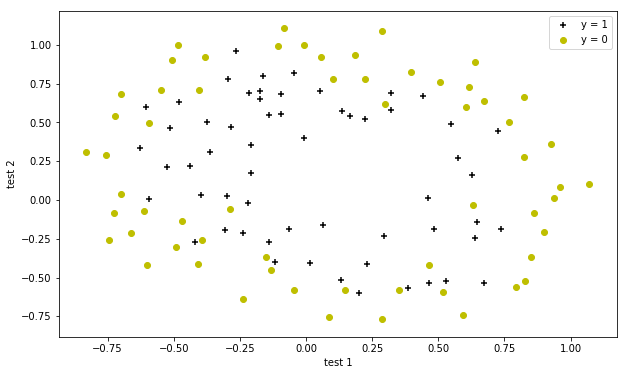

In [62]:
def plotData(X, y):
    plt.figure(figsize=(10,6))
    plt.xlabel("test 1")
    plt.ylabel("test 2")
    
    plt.scatter(X[:,0][y == 1], 
                X[:,1][y == 1],
                marker="+", 
                color="k", 
                label="y = 1")
    plt.scatter(X[:,0][y == 0],
                X[:,1][y == 0], 
                marker="o",
                color="y",
                label="y = 0")
    
    plt.legend()
    plt.show()

plotData(X, y)

In [77]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [65]:
#This code I took from someone else (the OCTAVE equivalent was provided in the HW)
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers as described in the homework assignment
    """
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

X_ = mapFeature(X[:,0], X[:,1])

In [59]:
def mapFeature(X, degree=6):
    """ 
    Feature mapping function to polynomial features

    MAPFEATURE(X, degree) maps the two input features
    to quadratic features used in the regularization exercise.

    Returns a new feature array with more features, comprising of
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
    """
    quads = Series([X.iloc[0]**(i-j) * X.iloc[1]**j for i in range(1,degree+1) for j in range(i+1)])
    return Series([1]).append([X,quads])

def mapFeature2(X1, X2, degree=6):
    """ 
    Feature mapping function to polynomial features

    MAPFEATURE(X, degree) maps the two input features
    to quadratic features used in the regularization exercise.

    Returns a new feature array with more features, comprising of
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
    """
    quads = Series([X1**(i-j) * X2**j for i in range(1,degree+1) for j in range(i+1)])
    return Series([1]).append([Series(X1), Series(X2), quads])

In [88]:
def costFunctionReg(theta, X, y, rate = 0.):
    m = len(y)
    hypothesis = sigmoid(X.dot(theta))
    
    term_1 = -1 * y * np.log(hypothesis)
    term_2 = (1 - y) * np.log(1-hypothesis)
    term_3 = np.sum(pow(theta, 2) * rate / (2*m)) 
    
    J = (1.0/m) * np.sum(term_1 - term_2) + term_3
    return J

initial_theta = np.zeros(len(X_[0]))
print("costFunctionReg with initial_theta: %.3f" % costFunctionReg(initial_theta, X_, y))

costFunctionReg with initial_theta: 0.693


In [89]:
from scipy import optimize

In [104]:
def optimizeRegularizedTheta(theta, X, y, rate=0.):
    result = optimize.minimize(costFunctionReg, 
                              theta, 
                              args=(X, y, rate),
                              options={"maxiter":500, "disp":False}, method="BFGS")
    return result.x, result.fun
optimized_theta, min_cost = optimizeRegularizedTheta(initial_theta, X_, y)

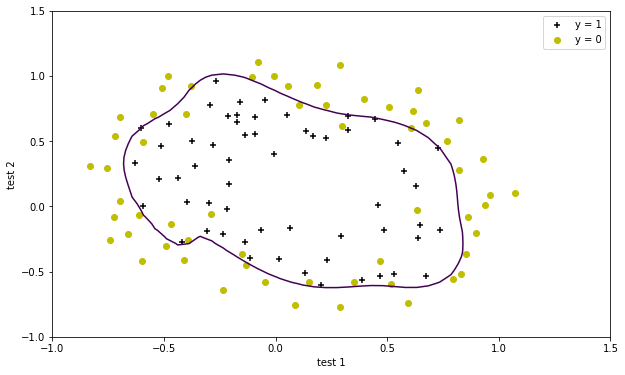

In [158]:
def plotBoundary(theta, X, y):
    plt.figure(figsize=(10,6))
    plt.xlabel("test 1")
    plt.ylabel("test 2")
    
    plt.scatter(X[:,1][y == 1], 
                X[:,2][y == 1],
                marker="+", 
                color="k", 
                label="y = 1")
    plt.scatter(X[:,1][y == 0],
                X[:,2][y == 0], 
                marker="o",
                color="y",
                label="y = 0")
    
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(optimized_theta,myfeaturesij.T)
    zvals = zvals.transpose()
    mycontour = plt.contour( xvals, yvals, zvals, [-1])
    plt.legend()
    plt.show()
    

plotBoundary(optimized_theta, X_, y)

In [123]:
xvals = np.linspace(-1,1.5,50)
yvals = np.linspace(-1,1.5,50)
zvals = np.zeros((len(xvals), len(yvals)))

In [125]:
zvals.shape

(50, 50)

[[ -5084.6547993   -4458.86280666  -3907.93207794 ...,  -1427.44046384
   -1607.07067059  -1809.94650787]
 [ -4126.30372603  -3589.16237048  -3119.02078739 ...,  -1164.29260762
   -1322.88393801  -1503.07882308]
 [ -3329.05181893  -2870.03912046  -2470.81262646 ...,   -947.68005253
   -1087.50252087  -1247.48846039]
 ..., 
 [ -2412.83846276  -2260.42327177  -2128.326913   ..., -24422.35877901
  -27131.97799274 -30120.57800716]
 [ -3021.91554488  -2852.25137996  -2705.28996998 ..., -28264.53541948
  -31265.40349454 -34566.23138701]
 [ -3761.98545608  -3574.19982815  -3411.74764404 ..., -32643.03261375
  -35961.54910103 -39602.25458101]]
